# NumPy -- MCEN 1030 -- 24 Oct

Here we will talk about perhaps the most useful package for engineering computing in python, numpy.

## Some background

**High-Level Programming Languages**

In building a new programming language there is a tradeoff that occurs:
- A designer can try to make the language **high-level**, meaning that it is easy to read for humans but correspondingly takes more time for the computer to interpret.
- Or the language can be **low-level**, in which case it is fast for the computer to interpret but harder for humans to understand.

Python and MATLAB are high-level languages. Assembly language is a low-level language. Here is the factorial function in assembly language, from https://gist.github.com/bieniekmateusz/3845880 . Actually, maybe this code does something malicious... how could we know?!

    section .text
	    global main
	    extern printf

    main:
	    mov ecx, 5
	    mov eax, ecx
	
    loop:
	    cmp ecx, 1
	    jle end
	
	    sub ecx, 1
	    mul ecx
	    jmp loop

    end:
	    push eax
	    push message
	    call printf
	    add esp, 8
	    ret

    section .data
	    message: db "The result is = %08X", 10, 0

High-level languages are "slow" because it takes some extra steps to convert the "human-readable" code into "machine-readable" code. Something like sqrt(x) is very readable to you and me, but "sqrt" requires a lot of hand-holding for the computer execute. And even using the variable "x" is not trivial... x is a character symbol that directs the computer to a certain location in memory where data of a certain type is stored, probably a "float" or "double float" ostensibly with the form $a\cdot 2^b$. A certain number of bits are devoted to storing the digits in $a$, and a certain are devoted to $b$, and there is a bit for the sign of $a$, and a bit for the sign of $b$, ... there is a lot of interpreting that has to happen! And it has to happen over and over again if we need to take the square root of a list of numbers!

**Why NumPy?**

Python was not originally designed for numerical computing. If you need to multiply two matrices together in native Python, you need to use a for loop on a list of lists (i.e., the matrix is [[1,3],[5,7]]... a list of lists). Lists are not at all specialized to numbers -- they can contain numbers, or 'strings', or other lists. And so, ostensibly, the computer has to figure out what is going on with the referencing in the loop, what data it is then looking at, how to interpret the data, then it must do whatever operations are necessary, etc. So, not only is the human-readable code not particularly concise (compare to MATLAB: A*B is the matrix product!), the code is not readily "readable" by the computer. All this means... slowness.

Enter NumPy, a package that tries to smooth-out the conversion of high-level instructions to low-level instructions. It is ostensibly specialized to numbers, notably including large 1D and 2D arrays of numbers.

## Let's work with NumPy

We start by importing the package, and usually give it a shorthand name "np".

In [2]:
# in jupyter, it is common to include the import step as its own cell so that we don't have to import over and over again
import numpy as np 
import math        # let's import this too, for comparison
import time        # we'll use this to create a timer

The basic math package in Python doesn't know how to deal with lists of numbers:

In [30]:
x=list(range(1000000))

#z=math.sqrt(x) # 
#print(z)

So we need a different strategy. The following is maybe the best way to do math on lists in python...

In [32]:
tic=time.time() # we are going to wrap a timer around the mathematical work, to compare

z=[math.sqrt(i)*math.sin(i) for i in x]

toc=time.time()
print(toc-tic)

0.07934117317199707


In [36]:
x=np.arange(1000000)

tic=time.time()

z=np.sqrt(x)*np.sin(x)

toc=time.time()
print(toc-tic)

0.007030963897705078


## NumPy code can be a bit ugly

... but once you figure out how to talk to it, it works great.

In [38]:
# create an array from a python list
x=np.array([1, 3, 5, 7, 9])
print(x)

[1 3 5 7 9]


In [40]:
# also can create arrays systematically
z=np.zeros(5) # I like this better than MATLAB... MATLAB would create a 5x5 matrix with this code
print(z)

a=np.linspace(1,4,10) # first element is 1, last is 4, and the array is 10 long
print(a)

b=np.arange(10) # 0 to 9
print(b)

c=np.arange(-5,10,2) # start stop step
print(c)

[0. 0. 0. 0. 0.]
[1.         1.33333333 1.66666667 2.         2.33333333 2.66666667
 3.         3.33333333 3.66666667 4.        ]
[0 1 2 3 4 5 6 7 8 9]
[-5 -3 -1  1  3  5  7  9]


In [48]:
print(a*b)
print(np.multiply(a,b)) # same as above, both are same as MATLAB's a.*b
print(np.divide(a,b+1))
print(np.sqrt(a))
print(np.arctan(a))

[ 0.          1.33333333  3.33333333  6.          9.33333333 13.33333333
 18.         23.33333333 29.33333333 36.        ]
[ 0.          1.33333333  3.33333333  6.          9.33333333 13.33333333
 18.         23.33333333 29.33333333 36.        ]
[1.         0.66666667 0.55555556 0.5        0.46666667 0.44444444
 0.42857143 0.41666667 0.40740741 0.4       ]
[1.         1.15470054 1.29099445 1.41421356 1.52752523 1.63299316
 1.73205081 1.82574186 1.91485422 2.        ]
[0.78539816 0.92729522 1.03037683 1.10714872 1.16590454 1.21202566
 1.24904577 1.27933953 1.30454428 1.32581766]


...et cetera. So, a bit ugly with those np's floating around, but works well once you are used to that. You can avoid this requirement by instead doing the import differently:

    from numpy import array, sqrt

will allow you to call with sqrt(x) instead of np.sqrt(x), but you have to import the tools individually. Also you can rename functions:

In [50]:
from numpy import array, arange, sqrt

x=np.arange(100)
print(sqrt(x))

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.         3.16227766 3.31662479
 3.46410162 3.60555128 3.74165739 3.87298335 4.         4.12310563
 4.24264069 4.35889894 4.47213595 4.58257569 4.69041576 4.79583152
 4.89897949 5.         5.09901951 5.19615242 5.29150262 5.38516481
 5.47722558 5.56776436 5.65685425 5.74456265 5.83095189 5.91607978
 6.         6.08276253 6.164414   6.244998   6.32455532 6.40312424
 6.4807407  6.55743852 6.63324958 6.70820393 6.78232998 6.8556546
 6.92820323 7.         7.07106781 7.14142843 7.21110255 7.28010989
 7.34846923 7.41619849 7.48331477 7.54983444 7.61577311 7.68114575
 7.74596669 7.81024968 7.87400787 7.93725393 8.         8.06225775
 8.1240384  8.18535277 8.24621125 8.30662386 8.36660027 8.42614977
 8.48528137 8.54400375 8.60232527 8.66025404 8.71779789 8.77496439
 8.83176087 8.88819442 8.94427191 9.         9.05538514 9.11043358
 9.16515139 9.21954446 9.2736185  9.32737905 9.38083152 9.43398

In [52]:
# code here
import numpy as np

Nicksfxn=np.sqrt

print(Nicksfxn(x))


[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.         3.16227766 3.31662479
 3.46410162 3.60555128 3.74165739 3.87298335 4.         4.12310563
 4.24264069 4.35889894 4.47213595 4.58257569 4.69041576 4.79583152
 4.89897949 5.         5.09901951 5.19615242 5.29150262 5.38516481
 5.47722558 5.56776436 5.65685425 5.74456265 5.83095189 5.91607978
 6.         6.08276253 6.164414   6.244998   6.32455532 6.40312424
 6.4807407  6.55743852 6.63324958 6.70820393 6.78232998 6.8556546
 6.92820323 7.         7.07106781 7.14142843 7.21110255 7.28010989
 7.34846923 7.41619849 7.48331477 7.54983444 7.61577311 7.68114575
 7.74596669 7.81024968 7.87400787 7.93725393 8.         8.06225775
 8.1240384  8.18535277 8.24621125 8.30662386 8.36660027 8.42614977
 8.48528137 8.54400375 8.60232527 8.66025404 8.71779789 8.77496439
 8.83176087 8.88819442 8.94427191 9.         9.05538514 9.11043358
 9.16515139 9.21954446 9.2736185  9.32737905 9.38083152 9.43398

... but you'll probably learn to live with the silly np stuff.

## A problem

Let's do a basic problem here: For $0 \leq x \leq x_\text{max}$, the value of $y(x)$ is: $y_0$ if $x\leq x_\text{crit}$, and $y_0+b\sqrt{x-x_\text{crit}}$ if $x>x_\text{crit}$.



In [56]:
import numpy as np

def pw_sqrt(x,x_crit,y_0,b):
    y=np.zeros(len(x))
    for i in np.arange(len(y)):
        if x[i]<=x_crit:
            y[i]=y_0
        else:
            y[i]=y_0+b*np.sqrt(x[i]-x_crit)
    return y

x=np.linspace(0,10,100)
y=pw_sqrt(x,5,1,3)

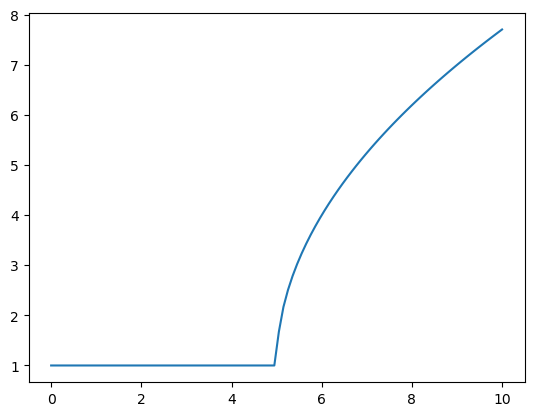

In [58]:
import matplotlib.pyplot as plt

plt.plot(x,y)